<a href="https://colab.research.google.com/github/carolinirufino/Telecom_X_2/blob/main/TelecomX_2_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📚 Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV








In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Edracky/TelecomX-Parte-2/refs/heads/main/TelecomX-2-Data-Processedo.csv')

df.head()

,ID_Cliente,Rotatividade,Sexo_Cliente,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato_Conta,Conta_Digital,Metodo_Pagamento,Encargos_Mensais,Encargos_Totais,Contas_Diarias
0,0002-ORFBO,0,feminino,0,1,1,9,1,0.0,dsl,...,0.0,1.0,1.0,0.0,anual,1,cheque enviado,65.6,593.30,2.186667
1,0003-MKNFE,0,masculino,0,0,0,9,1,1.0,dsl,...,0.0,0.0,0.0,1.0,mensal,0,cheque enviado,59.9,542.40,1.996667
2,0004-TLHLJ,1,masculino,0,0,0,4,1,0.0,fibra óptica,...,1.0,0.0,0.0,0.0,mensal,1,cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,1,masculino,1,1,0,13,1,0.0,fibra óptica,...,1.0,0.0,1.0,1.0,mensal,1,cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,1,feminino,1,1,0,3,1,0.0,fibra óptica,...,0.0,1.0,1.0,0.0,mensal,1,cheque enviado,83.9,267.40,2.796667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Rotatividade          7267 non-null   int64  
 2   Sexo_Cliente          7267 non-null   object 
 3   Cliente_Idoso         7267 non-null   int64  
 4   Cliente_Parceiro      7267 non-null   int64  
 5   Cliente_Dependentes   7267 non-null   int64  
 6   Tempo_Servico         7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   int64  
 8   Multiplas_Linhas      7267 non-null   float64
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   float64
 11  Backup_Online         7267 non-null   float64
 12  Protecao_Dispositivo  7267 non-null   float64
 13  Suporte_Tecnico       7267 non-null   float64
 14  Streaming_TV          7267 non-null   float64
 15  Streaming_Filmes     

#📌 Extracão + Limpeza

In [ ]:
print(df.columns.tolist())


['ID_Cliente', 'Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro', 'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital', 'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais', 'Contas_Diarias']


In [ ]:
# Remover coluna ID_Cliente
df.pop('ID_Cliente')


,ID_Cliente
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7262,9987-LUTYD
7263,9992-RRAMN
7264,9992-UJOEL
7265,9993-LHIEB


In [ ]:
print(df.columns.tolist())

['Rotatividade', 'Sexo_Cliente', 'Cliente_Idoso', 'Cliente_Parceiro', 'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Contrato_Conta', 'Conta_Digital', 'Metodo_Pagamento', 'Encargos_Mensais', 'Encargos_Totais', 'Contas_Diarias']


In [ ]:
# Verificar tipos de dados:
tipos = pd.DataFrame(df.dtypes, columns=['Tipo_Dado'])
print(tipos)



                     Tipo_Dado
Rotatividade             int64
Sexo_Cliente            object
Cliente_Idoso            int64
Cliente_Parceiro         int64
Cliente_Dependentes      int64
Tempo_Servico            int64
Servico_Telefone         int64
Multiplas_Linhas       float64
Servico_Internet        object
Seguranca_Online       float64
Backup_Online          float64
Protecao_Dispositivo   float64
Suporte_Tecnico        float64
Streaming_TV           float64
Streaming_Filmes       float64
Contrato_Conta          object
Conta_Digital            int64
Metodo_Pagamento        object
Encargos_Mensais       float64
Encargos_Totais        float64
Contas_Diarias         float64


In [40]:
for col in variaveis_categoricas:
    print(f"{'='*40}")
    print(f"Coluna: {col}")
    print(f"{'-'*40}")

    # Contagem absoluta
    vc = df[col].value_counts()
    # Contagem percentual formatada como string com 2 casas decimais
    pct = df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

    # Monta um DataFrame temporário para impressão formatada
    res = pd.DataFrame({'Contagem': vc, 'Percentual': pct})

    # Itera para imprimir no formato valor | contagem | percentual
    for valor, row in res.iterrows():
        print(f"{str(valor):25} | {row['Contagem']:7} | {row['Percentual']:9}")
    print("\n")


Coluna: Sexo_Cliente
----------------------------------------
masculino                 |    3675 | 50.57%   
feminino                  |    3592 | 49.43%   


Coluna: Servico_Internet
----------------------------------------
fibra óptica              |    3198 | 44.01%   
dsl                       |    2488 | 34.24%   
nenhum                    |    1581 | 21.76%   


Coluna: Contrato_Conta
----------------------------------------
mensal                    |    4005 | 55.11%   
bienal                    |    1743 | 23.99%   
anual                     |    1519 | 20.9%    


Coluna: Metodo_Pagamento
----------------------------------------
cheque eletrônico         |    2445 | 33.65%   
cheque enviado            |    1665 | 22.91%   
transferência bancária    |    1589 | 21.87%   
cartão de crédito         |    1568 | 21.58%   




In [42]:
print("Lista de colunas:")
for col in df.columns:
    print(f" - {col}")


Lista de colunas:
 - Rotatividade
 - Sexo_Cliente
 - Cliente_Idoso
 - Cliente_Parceiro
 - Cliente_Dependentes
 - Tempo_Servico
 - Servico_Telefone
 - Multiplas_Linhas
 - Servico_Internet
 - Seguranca_Online
 - Backup_Online
 - Protecao_Dispositivo
 - Suporte_Tecnico
 - Streaming_TV
 - Streaming_Filmes
 - Contrato_Conta
 - Conta_Digital
 - Metodo_Pagamento
 - Encargos_Mensais
 - Encargos_Totais
 - Contas_Diarias


In [154]:
# Formatar com tabulate (biblioteca externa, visualização em terminal)
#from tabulate import tabulate

print(tabulate(df.head(), headers='keys', tablefmt='psql'))


+----+----------------+-----------------+--------------------+-----------------------+-----------------+--------------------+--------------------+--------------------+-----------------+------------------------+-------------------+----------------+--------------------+-----------------+--------------------+-------------------+------------------+--------------------------+---------------------------------+---------------------------+-------------------------+-------------------------+--------------------------------------+-----------------------------------+-------------------------------------------+
|    |   Rotatividade |   Cliente_Idoso |   Cliente_Parceiro |   Cliente_Dependentes |   Tempo_Servico |   Servico_Telefone |   Multiplas_Linhas |   Seguranca_Online |   Backup_Online |   Protecao_Dispositivo |   Suporte_Tecnico |   Streaming_TV |   Streaming_Filmes |   Conta_Digital |   Encargos_Mensais |   Encargos_Totais |   Contas_Diarias |   Sexo_Cliente_masculino |   Servico_Internet_

# 🅾️ Criação de variáveis Dummy / One-Hot

In [77]:
df.columns = df.columns.str.strip()


In [155]:
variaveis_categoricas = ['Sexo_Cliente', 'Servico_Internet', 'Contrato_Conta', 'Metodo_Pagamento']

# Filtra apenas as colunas presentes no df
variaveis_categoricas_existentes = [col for col in variaveis_categoricas if col in df.columns]

print("Colunas que serão codificadas:")
print(variaveis_categoricas_existentes)

# Executa o get_dummies somente nas colunas existentes
df_encoded = pd.get_dummies(df, columns=variaveis_categoricas_existentes, drop_first=True)


Colunas que serão codificadas:
[]


In [81]:
numeric_cols = df_encoded.select_dtypes(include='number').columns
df_encoded[numeric_cols] = df_encoded[numeric_cols].astype(int)
df

,Rotatividade,Cliente_Idoso,Cliente_Parceiro,Cliente_Dependentes,Tempo_Servico,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Encargos_Totais,Contas_Diarias,Sexo_Cliente_masculino,Servico_Internet_fibra óptica,Servico_Internet_nenhum,Contrato_Conta_bienal,Contrato_Conta_mensal,Metodo_Pagamento_cheque eletrônico,Metodo_Pagamento_cheque enviado,Metodo_Pagamento_transferência bancária
0,0,0,1,1,9,1,0,0,1,0,...,593,2,0,0,0,0,0,0,1,0
1,0,0,0,0,9,1,1,0,0,0,...,542,1,1,0,0,0,1,0,1,0
2,1,0,0,0,4,1,0,0,0,1,...,280,2,1,1,0,0,1,1,0,0
3,1,1,1,0,13,1,0,0,1,1,...,1237,3,1,1,0,0,1,1,0,0
4,1,1,1,0,3,1,0,0,0,0,...,267,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,1,0,0,...,742,1,0,0,0,0,0,0,1,0
7263,1,0,1,0,22,1,1,0,0,0,...,1873,2,1,1,0,0,1,1,0,0
7264,0,0,0,0,2,1,0,0,1,0,...,92,1,1,0,0,0,1,0,1,0
7265,0,0,1,1,67,1,0,1,0,1,...,4627,2,1,0,0,1,0,0,1,0


In [85]:
# colunas dummy criadas de uma categoria, exwmplo:
sexo_cols = [col for col in df_encoded.columns if col.startswith('Sexo_Cliente_')]
print("Colunas de Sexo_Cliente dummy:", sexo_cols)

servico_internet_cols = [col for col in df_encoded.columns if col.startswith('Servico_Internet_')]
print("Colunas de Servico_Internet dummy:", servico_internet_cols)

# E assim para as outras categorias


Colunas de Sexo_Cliente dummy: ['Sexo_Cliente_masculino']
Colunas de Servico_Internet dummy: ['Servico_Internet_fibra óptica', 'Servico_Internet_nenhum']


In [86]:
print("Todas as colunas do dataset codificado:")
print(df_encoded.columns.tolist())


Todas as colunas do dataset codificado:
['Rotatividade', 'Cliente_Idoso', 'Cliente_Parceiro', 'Cliente_Dependentes', 'Tempo_Servico', 'Servico_Telefone', 'Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Conta_Digital', 'Encargos_Mensais', 'Encargos_Totais', 'Contas_Diarias', 'Sexo_Cliente_masculino', 'Servico_Internet_fibra óptica', 'Servico_Internet_nenhum', 'Contrato_Conta_bienal', 'Contrato_Conta_mensal', 'Metodo_Pagamento_cheque eletrônico', 'Metodo_Pagamento_cheque enviado', 'Metodo_Pagamento_transferência bancária']


# ⚠️ Checagem do Desbalanceamento de Clientes Evasivos


In [92]:
# Contagem dos clientes por situação de churn (rotatividade)
contagem_clientes = df['Rotatividade'].value_counts().sort_index()
status_clientes = {0: "Clientes Ativos", 1: "Clientes Evasivos"}

# Criando DataFrame resumo com quantidade e percentual
resumo_churn = pd.DataFrame({
    'Total': [contagem_clientes.get(0, 0), contagem_clientes.get(1, 0)]
}, index=[status_clientes[0], status_clientes[1]])
resumo_churn['Percentual (%)'] = (resumo_churn['Total'] / resumo_churn['Total'].sum() * 100).round(2)

# Exibir resumo formatado
print('\nResumo da Situação dos Clientes:')
print(resumo_churn)

# Calcular a razão entre clientes evasivos e ativos
taxa_evasao = resumo_churn.loc[status_clientes[1], 'Total'] / resumo_churn.loc[status_clientes[0], 'Total'] if resumo_churn.loc[status_clientes[0], 'Total'] > 0 else None

# Exibição gráfica simples em barra de texto
barra_tamanho = 30
if taxa_evasao is not None:
    quant_barras_evasao = int(barra_tamanho * resumo_churn.loc[status_clientes[1], 'Percentual (%)'] / 100)
    quant_barras_ativos = barra_tamanho - quant_barras_evasao

    print(f"\n{status_clientes[0]:<20}: {'█' * quant_barras_ativos}{'.' * quant_barras_evasao} ({resumo_churn.loc[status_clientes[0], 'Percentual (%)']}%)")
    print(f"{status_clientes[1]:<20}: {'█' * quant_barras_evasao}{'.' * quant_barras_ativos} ({resumo_churn.loc[status_clientes[1], 'Percentual (%)']}%)")
    print(f"\nTaxa evasão (evasivos / ativos): {taxa_evasao:.4f}")

    if taxa_evasao < 0.2:
        print("⚠️ Atenção: desbalanceamento significativo — muito menos clientes evasivos que ativos.")
    else:
        print("✔️ Distribuição das classes está aceitavelmente equilibrada.")
else:
    print("❌ Erro: cálculo da taxa de evasão não pôde ser realizado devido à divisão por zero.")



Resumo da Situação dos Clientes:
                   Total  Percentual (%)
Clientes Ativos     5398           74.28
Clientes Evasivos   1869           25.72

Clientes Ativos     : ███████████████████████....... (74.28%)
Clientes Evasivos   : ███████....................... (25.72%)

Taxa evasão (evasivos / ativos): 0.3462
✔️ Distribuição das classes está aceitavelmente equilibrada.


#🧠 Matriz de Correlação e Interpretação Analítica de Variáveis


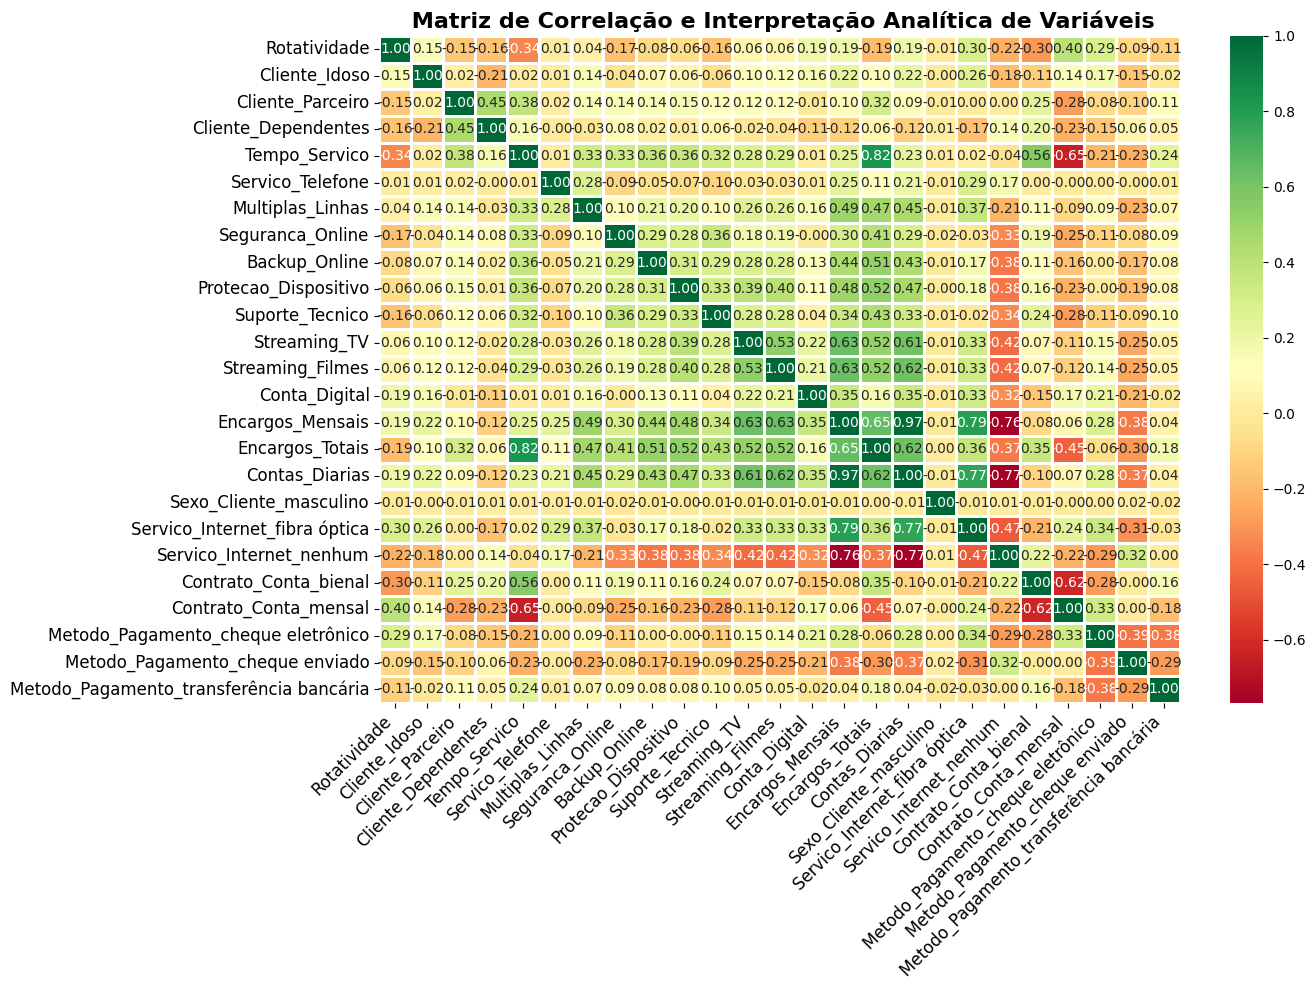

In [156]:
# Seleciona todas as colunas numéricas
colunas_numericas = df.select_dtypes(include='number').columns

# Calcula a matriz de correlação para todas as colunas numéricas
df_corr_todas = df[colunas_numericas].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    df_corr_todas,
    cmap='RdYlGn',
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='white',
    annot_kws={'size': 10}
)
plt.title(' Matriz de Correlação e Interpretação Analítica de Variáveis', fontsize=16, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


In [115]:
# Correlação de cada variável com 'Rotatividade', ordenadas:
correlacoes_com_churn = df_corr['Rotatividade'].drop('Rotatividade').sort_values(key=abs, ascending=False)

print("🔍 Variáveis mais correlacionadas com a evasão:")
print(correlacoes_com_churn)

🔍 Variáveis mais correlacionadas com a evasão:
Contrato_Conta_mensal                      0.395584
Tempo_Servico                             -0.344079
Servico_Internet_fibra óptica              0.300949
Contrato_Conta_bienal                     -0.295138
Metodo_Pagamento_cheque eletrônico         0.294626
Servico_Internet_nenhum                   -0.224051
Encargos_Totais                           -0.194018
Contas_Diarias                             0.192562
Encargos_Mensais                           0.189907
Conta_Digital                              0.186666
Seguranca_Online                          -0.166828
Cliente_Dependentes                       -0.161384
Suporte_Tecnico                           -0.160440
Cliente_Parceiro                          -0.148546
Cliente_Idoso                              0.146733
Metodo_Pagamento_transferência bancária   -0.114767
Metodo_Pagamento_cheque enviado           -0.090061
Backup_Online                             -0.080163
Protecao_Disposit

# 📈 Fatores Numéricos mais Associados à Evasão de Clientes


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

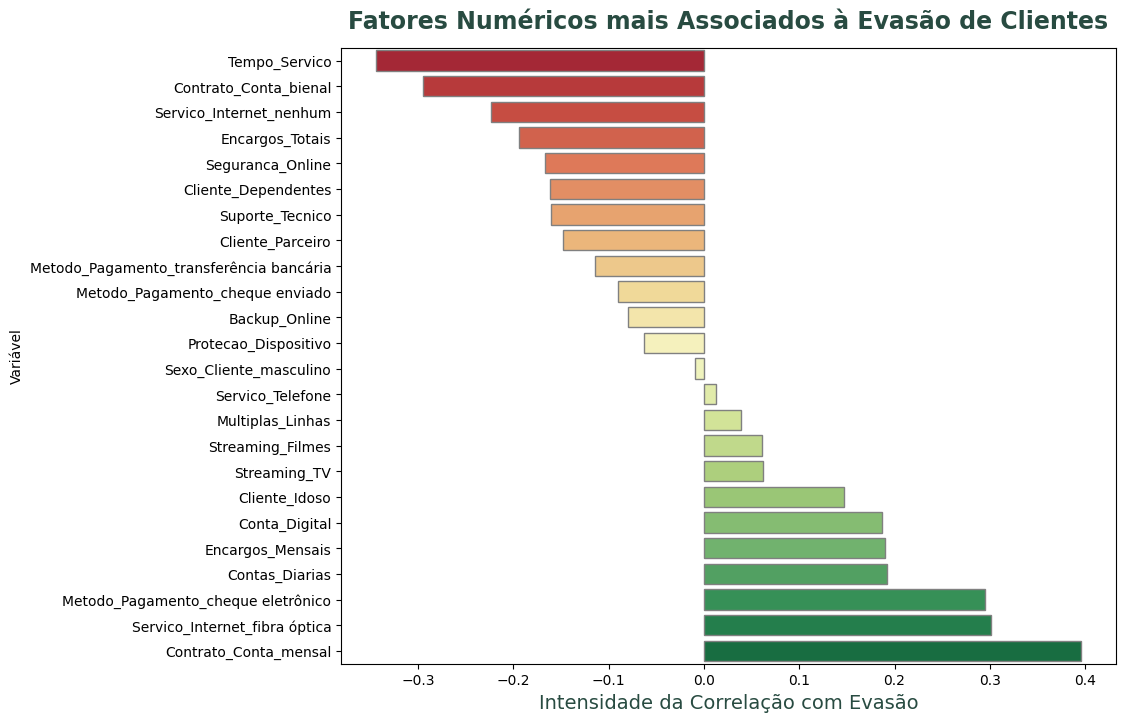

In [129]:
# Passo 1: Calcular as correlações com a variável de interesse
correlacoes = df.corr(numeric_only=True)['Rotatividade'].drop('Rotatividade')  # Remove autocorrelação

# Passo 2: Organizar para visualização
correlacoes_df = correlacoes.reset_index()
correlacoes_df.columns = ['Variável', 'Correlação']
correlacoes_df = correlacoes_df.sort_values('Correlação', ascending=True)  # Organiza da menor para maior

# Passo 3: Criar gráfico elegante e customizado
plt.figure(figsize=(10, 8))
sns.barplot(
    data=correlacoes_df,
    x='Correlação',
    y='Variável',
    hue='Variável',
    palette='RdYlGn', # Vermelho → amarelo → verde (destaca correlação positiva/negativa)
    legend=False,
    edgecolor='grey'
)

plt.title('Fatores Numéricos mais Associados à Evasão de Clientes', fontsize=17, weight='bold', pad=14, color='#284b41')
plt.xlabel('Intensidade da Correlação com Evasão', fontsize=14, color='#284b41')
plt


# 🎯 Dispersão Individual do Tempo de Serviço por Rotatividade


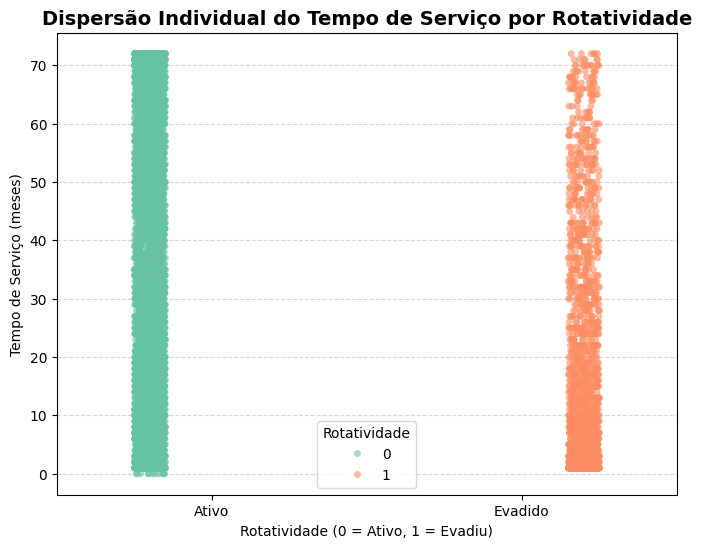

In [134]:
plt.figure(figsize=(8, 6))
sns.stripplot(
    x='Rotatividade', y='Tempo_Servico', data=df, hue='Rotatividade',  jitter=True, palette='Set2', dodge=True, alpha=0.6
)
plt.title('Dispersão Individual do Tempo de Serviço por Rotatividade', fontsize=14, weight='bold')
plt.xlabel('Rotatividade (0 = Ativo, 1 = Evadiu)')
plt.ylabel('Tempo de Serviço (meses)')
plt.xticks([0, 1], ['Ativo', 'Evadido'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# 🔗 Associação entre Tempo de Serviço e Gastos Totais por Status de Cliente


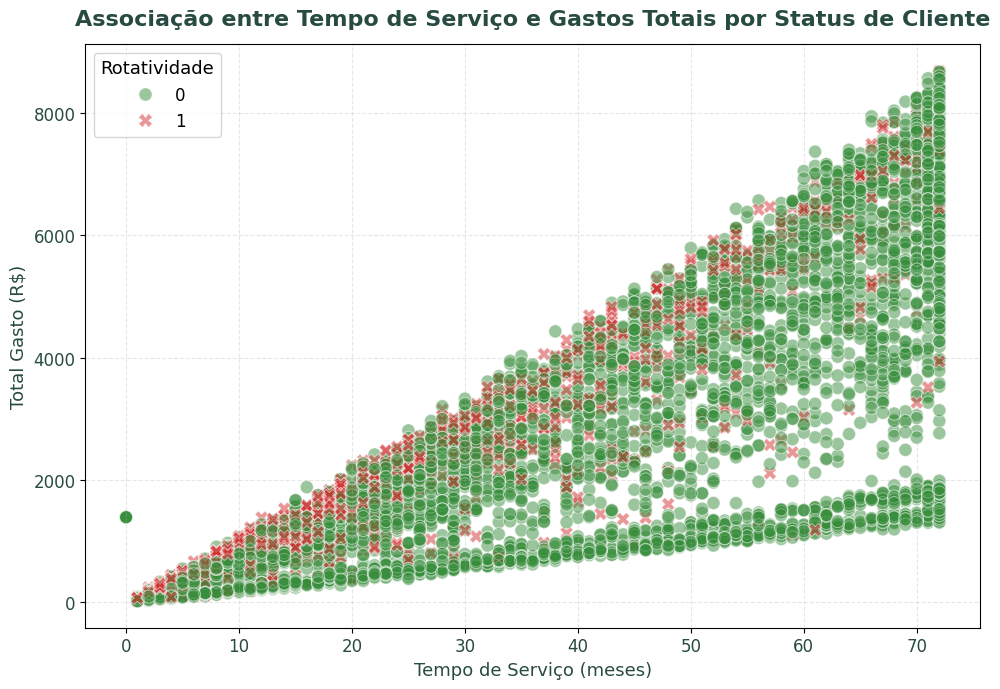

In [142]:
plt.figure(figsize=(10, 7))

# Gráfico de dispersão com marcadores diferenciados e cores suaves
sns.scatterplot(
    data=df,
    x='Tempo_Servico',
    y='Encargos_Totais',
    hue='Rotatividade',
    palette={0: '#388e3c', 1: '#d32f2f'},      # verde escuro para ativos, vermelho escuro para evadidos
    style='Rotatividade',
    markers={0: 'o', 1: 'X'},
    s=90,                                      # tamanho dos pontos
    alpha=0.5,
    edgecolor='white',
    legend='full'
)

plt.title('Associação entre Tempo de Serviço e Gastos Totais por Status de Cliente',
          fontsize=16, weight='bold', color='#284b41', pad=14)
plt.xlabel('Tempo de Serviço (meses)', fontsize=13, color='#284b41')
plt.ylabel('Total Gasto (R$)', fontsize=13, color='#284b41')

plt.xticks(fontsize=12, color='#284b41')
plt.yticks(fontsize=12, color='#284b41')

plt.grid(True, linestyle='--', alpha=0.30)
plt.tight_layout()
plt.legend(title='Rotatividade', title_fontsize=13, fontsize=12, frameon=True)
plt.show()


# ✂️ Resumo da Separação dos Dados

In [159]:
# from sklearn.model_selection import train_test_split

# Separação dos dados
X = df.drop('Rotatividade', axis=1)
y = df['Rotatividade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mensagem final padronizada e visual
total = X.shape[0]
print("✂️ Resumo da Separação dos Dados")
print(f"🔹 Total de amostras:    {total}")
print(f"🔸 Dados de treino:      {X_train.shape[0]} amostras ({100*X_train.shape[0]/total:.1f}%)")
print(f"🔸 Dados de teste:       {X_test.shape[0]} amostras ({100*X_test.shape[0]/total:.1f}%)")


✂️ Resumo da Separação dos Dados
🔹 Total de amostras:    7267
🔸 Dados de treino:      5086 amostras (70.0%)
🔸 Dados de teste:       2181 amostras (30.0%)


# 🤖 Modelo 1 - Construção Avançada de Modelos Preditivos

In [161]:
# -------------------------------------------------------------
# Modelo 1: Regressão Logística (precisa de normalização)
#
# Por quê?
# A Regressão Logística compara pesos das variáveis.
# Se cada variável tiver uma escala diferente (ex: meses x reais),
# as que têm números maiores podem dominar a análise, mesmo sem serem as mais relevantes.
# Por isso, usamos o StandardScaler para padronizar tudo na mesma escala
# (média 0, desvio padrão 1), garantindo aprendizado justo.
# -------------------------------------------------------------

# Construção do pipeline (normalização + regressão logística)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treinamento
pipe_lr.fit(X_train, y_train)

# Previsão
y_pred_lr = pipe_lr.predict(X_test)

# Avaliação: relatório detalhado
print("🔍 Relatório de Performance – Regressão Logística\n")
report_dict = classification_report(y_test, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df.style.format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'}).background_gradient(cmap='YlGnBu'))


🔍 Relatório de Performance – Regressão Logística



,precision,recall,f1-score,support
0,0.85,0.89,0.87,1620
1,0.64,0.54,0.58,561
accuracy,0.80,0.80,0.80,1
macro avg,0.74,0.72,0.73,2181
weighted avg,0.79,0.80,0.80,2181


# 🌲 Modelo 2 - Exploração Preditiva Avançada (Random Forest)

In [166]:
# -------------------------------------------------------------
# Modelo 2: Random Forest (não exige normalização)
#
# Por quê?
# Random Forest é um modelo baseado em árvores de decisão.
# Ele avalia cortes e divisões nos dados, não sendo influenciado pela escala das variáveis.
# Por isso, não é necessária padronização antes do treino.
# -------------------------------------------------------------

# Construção do modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Treinamento
rf.fit(X_train, y_train)

# Previsão (teste)
y_pred_rf = rf.predict(X_test)

# Avaliação: relatório detalhado em tabela colorida
print("🌳 Relatório de Performance – Random Forest\n")
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()
display(report_rf_df.style.format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'}).background_gradient(cmap='YlGnBu'))


🌳 Relatório de Performance – Random Forest



,precision,recall,f1-score,support
0,0.83,0.89,0.86,1620
1,0.61,0.48,0.53,561
accuracy,0.79,0.79,0.79,1
macro avg,0.72,0.69,0.70,2181
weighted avg,0.77,0.79,0.78,2181


# 🧮 Resumo do Balanceamento (SMOTE)

In [168]:
# -------------------------------------------------------------
# 🧪 Balanceamento das Classes com SMOTE
#
# Por quê?
# O SMOTE (Synthetic Minority Over-sampling Technique) cria exemplos sintéticos
# para a classe minoritária, melhorando o equilíbrio entre as classes no treino.
# Isso evita que o modelo fique “viciado” na classe majoritária.
# -------------------------------------------------------------

# Aplicação do SMOTE somente nos dados de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Resumo antes e depois
total = y_train.shape[0]
total_smote = y_train_smote.shape[0]

print("🧮 Resumo do Balanceamento (SMOTE):\n")
print(f"Antes do SMOTE:\n"
      f"  Ativos   : {y_train.value_counts()[0]}\n"
      f"  Evadidos : {y_train.value_counts()[1]}\n"
      f"  Total    : {total}")
print(f"\nDepois do SMOTE:\n"
      f"  Ativos   : {y_train_smote.value_counts()[0]}\n"
      f"  Evadidos : {y_train_smote.value_counts()[1]}\n"
      f"  Total    : {total_smote}")

print("\n✔️ Classes agora balanceadas e prontas para treinamento!")


🧮 Resumo do Balanceamento (SMOTE):

Antes do SMOTE:
  Ativos   : 3778
  Evadidos : 1308
  Total    : 5086

Depois do SMOTE:
  Ativos   : 3778
  Evadidos : 3778
  Total    : 7556

✔️ Classes agora balanceadas e prontas para treinamento!


# 🤖💪 Regressão Logística Bombada com SMOTE Turbo!

In [170]:
# -------------------------------------------------------------
# 🤖 Modelo 1b: Regressão Logística (após balanceamento com SMOTE)
#
# Por quê?
# Agora treinamos a Regressão Logística nos dados equilibrados pelo SMOTE,
# permitindo que o modelo aprenda corretamente a classe minoritária, sem viés.
# Mantemos a normalização para garantir justeza entre as escalas.
# -------------------------------------------------------------

# Pipeline de normalização + regressão logística
pipe_lr_smote = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treinamento com dados balanceados (SMOTE)
pipe_lr_smote.fit(X_train_smote, y_train_smote)

# Previsão no conjunto de teste real (sem dados sintéticos)
y_pred_smote = pipe_lr_smote.predict(X_test)

# Avaliação detalhada em tabela colorida
print("🧪 Relatório de Performance – Regressão Logística pós-SMOTE\n")
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
report_smote_df = pd.DataFrame(report_smote).transpose()
display(report_smote_df.style.format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'}).background_gradient(cmap='YlGnBu'))


🧪 Relatório de Performance – Regressão Logística pós-SMOTE



,precision,recall,f1-score,support
0,0.87,0.81,0.84,1620
1,0.54,0.64,0.58,561
accuracy,0.77,0.77,0.77,1
macro avg,0.70,0.72,0.71,2181
weighted avg,0.78,0.77,0.77,2181


# 🌳🧪 Floresta Turbinada com Super SMOTE!

In [172]:
# -------------------------------------------------------------
# 🌳🧪 Modelo 2b: Random Forest com SMOTE (dados balanceados)
#
# Por quê?
# Agora a floresta é treinada com as classes balanceadas via SMOTE,
# garantindo que o modelo tenha igual chance de aprender sobre clientes ativos e evadidos.
# -------------------------------------------------------------

# 1. Aplica SMOTE nos dados de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Resumo das classes antes e depois
print("🧮 Resumo do Balanceamento (SMOTE):\n")
print(f"Antes do SMOTE:\n"
      f"  Ativos   : {y_train.value_counts()[0]}\n"
      f"  Evadidos : {y_train.value_counts()[1]}")
print(f"\nDepois do SMOTE:\n"
      f"  Ativos   : {y_train_smote.value_counts()[0]}\n"
      f"  Evadidos : {y_train_smote.value_counts()[1]}")
print("\n✔️ Classes agora balanceadas e prontas para Random Forest!\n")

# 2. Treinamento Random Forest com dados balanceados
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# 3. Previsão no conjunto de teste real
y_pred_rf_smote = rf_smote.predict(X_test)

# 4. Avaliação detalhada em tabela colorida
print("🌳🧪 Relatório de Performance – Random Forest com SMOTE\n")
report_rf_smote = classification_report(y_test, y_pred_rf_smote, output_dict=True)
report_rf_smote_df = pd.DataFrame(report_rf_smote).transpose()
display(report_rf_smote_df.style.format({'precision': '{:.2f}', 'recall': '{:.2f}', 'f1-score': '{:.2f}', 'support': '{:.0f}'}).background_gradient(cmap='YlGnBu'))


🧮 Resumo do Balanceamento (SMOTE):

Antes do SMOTE:
  Ativos   : 3778
  Evadidos : 1308

Depois do SMOTE:
  Ativos   : 3778
  Evadidos : 3778

✔️ Classes agora balanceadas e prontas para Random Forest!

🌳🧪 Relatório de Performance – Random Forest com SMOTE



,precision,recall,f1-score,support
0,0.85,0.82,0.84,1620
1,0.53,0.58,0.56,561
accuracy,0.76,0.76,0.76,1
macro avg,0.69,0.70,0.70,2181
weighted avg,0.77,0.76,0.76,2181


# 🏋️‍♂️ Avaliação de Performance | Regressão Logística com SMOTE

🏋️‍♂️ Avaliação de Performance | Regressão Logística com SMOTE
------------------------------------------------------------
✅ Acurácia : 0.7662
⚠️ Precisão : 0.5382
⚠️ Recall   : 0.6399
⚠️ F1-score : 0.5847

🔹 Matriz de Confusão:
[[1312  308]
 [ 202  359]]


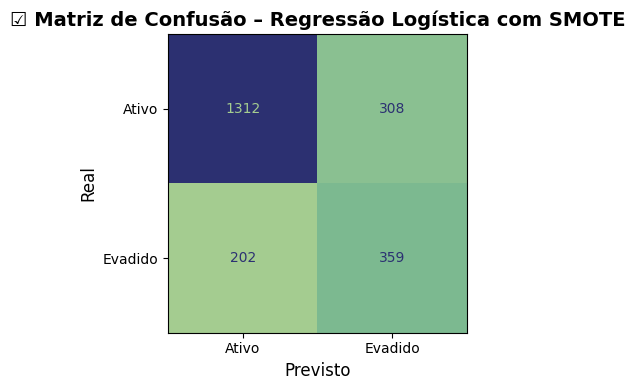

In [178]:
# ----------- Avaliação: Regressão Logística com SMOTE -----------
y_pred_lr_smote = pipe_lr_smote.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr_smote)
prec_lr = precision_score(y_test, y_pred_lr_smote)
rec_lr = recall_score(y_test, y_pred_lr_smote)
f1_lr = f1_score(y_test, y_pred_lr_smote)
cm_lr = confusion_matrix(y_test, y_pred_lr_smote)
metricas_lr = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score'],
    'Valor': [acc_lr, prec_lr, rec_lr, f1_lr]
})

print("="*60)
print("🏋️‍♂️ Avaliação de Performance | Regressão Logística com SMOTE")
print("-"*60)
for idx, row in metricas_lr.iterrows():
    simbolo = "✅" if row['Valor'] > 0.7 else "⚠️" if row['Valor'] > 0.5 else "❌"
    print(f"{simbolo} {row['Métrica']:<9}: {row['Valor']:.4f}")
print("\n🔹 Matriz de Confusão:")
print(cm_lr)
print("="*60)

disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Ativo', 'Evadido'])
fig, ax = plt.subplots(figsize=(5, 4))
disp_lr.plot(cmap='crest', ax=ax, colorbar=False)
plt.title('☑ Matriz de Confusão – Regressão Logística com SMOTE', fontsize=14, fontweight='bold')
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.tight_layout()
plt.show()

# 🌳 Avaliação de Performance | Random Forest com SMOTE

🌳 Avaliação de Performance | Random Forest com SMOTE
------------------------------------------------------------
✅ Acurácia : 0.7616
⚠️ Precisão : 0.5337
⚠️ Recall   : 0.5793
⚠️ F1-score : 0.5556

🔹 Matriz de Confusão:
[[1336  284]
 [ 236  325]]


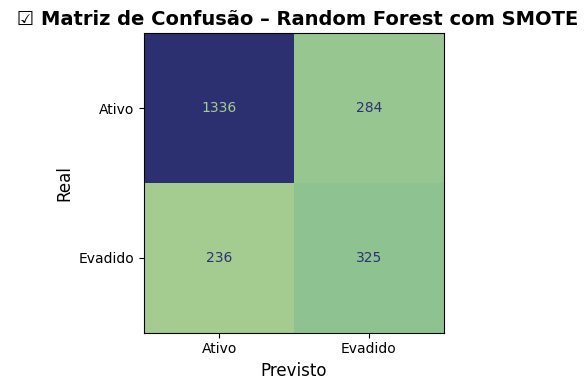

In [180]:
# ------------ Avaliação: Random Forest com SMOTE ------------
y_pred_rf_smote = rf_smote.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf_smote)
prec_rf = precision_score(y_test, y_pred_rf_smote)
rec_rf = recall_score(y_test, y_pred_rf_smote)
f1_rf = f1_score(y_test, y_pred_rf_smote)
cm_rf = confusion_matrix(y_test, y_pred_rf_smote)
metricas_rf = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score'],
    'Valor': [acc_rf, prec_rf, rec_rf, f1_rf]
})

print("="*60)
print("🌳 Avaliação de Performance | Random Forest com SMOTE")
print("-"*60)
for idx, row in metricas_rf.iterrows():
    simbolo = "✅" if row['Valor'] > 0.7 else "⚠️" if row['Valor'] > 0.5 else "❌"
    print(f"{simbolo} {row['Métrica']:<9}: {row['Valor']:.4f}")
print("\n🔹 Matriz de Confusão:")
print(cm_rf)
print("="*60)

disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ativo', 'Evadido'])
fig, ax = plt.subplots(figsize=(5, 4))
disp_rf.plot(cmap='crest', ax=ax, colorbar=False)
plt.title(' ☑ Matriz de Confusão – Random Forest com SMOTE', fontsize=14, fontweight='bold')
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.tight_layout()
plt.show()

# 🏆🤹♂️ Logística Malabarista: Equilíbrio de Parâmetros alimentado por SMOTE

In [185]:
# Pipeline que padroniza os dados e treina o modelo
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Parâmetros que queremos testar para otimizar o modelo
param_grid_lr = {
    'logreg__C': [0.01, 0.1, 1, 10],       # Controle da regularização
    'logreg__penalty': ['l2'],             # Tipo de regularização
    'logreg__solver': ['lbfgs']            # Algoritmo para otimização
}

# Configura a busca em grade com validação cruzada (5 folds), maximizando o f1-score
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train_smote, y_train_smote)

# Exibe o melhor resultado encontrado
print("Melhores parâmetros:", grid_search_lr.best_params_)
print(f"Melhor F1-score (validação cruzada): {grid_search_lr.best_score_:.4f}")

# Treina o modelo final com os melhores parâmetros e todos os dados de treino balanceados
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train_smote, y_train_smote)



Melhores parâmetros: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'lbfgs'}
Melhor F1-score (validação cruzada): 0.7980


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.1, max_iter=1000, random_state=42))])

★ Avaliação em Dados de Teste | Regressão Logística Otimizada
------------------------------------------------------------
✅ Acurácia : 0.7611
⚠️ Precisão : 0.5287
⚠️ Recall   : 0.6578
⚠️ F1-score : 0.5862

🔹 Relatório detalhado:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1620
           1       0.53      0.66      0.59       561

    accuracy                           0.76      2181
   macro avg       0.70      0.73      0.71      2181
weighted avg       0.78      0.76      0.77      2181



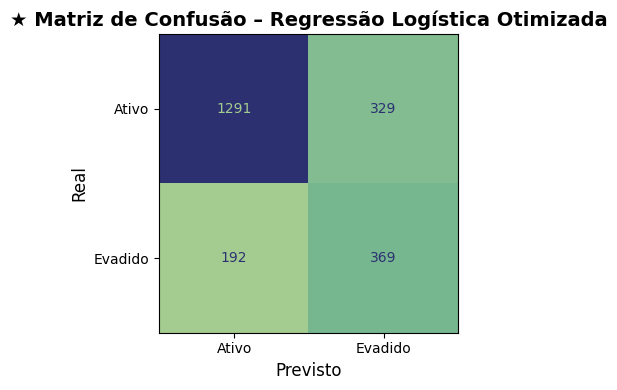

In [193]:

# 1. Gera previsões nos dados de teste
y_pred_test = best_lr.predict(X_test)

# 2. Calcula métricas principais
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# 3. Exibe relatório visual das métricas
metricas = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score'],
    'Valor': [acc, prec, rec, f1]
})
print("="*60)
print("★ Avaliação em Dados de Teste | Regressão Logística Otimizada")
print("-"*60)
for idx, row in metricas.iterrows():
    simbolo = "✅" if row['Valor'] > 0.7 else "⚠️" if row['Valor'] > 0.5 else "❌"
    print(f"{simbolo} {row['Métrica']:<9}: {row['Valor']:.4f}")
print("\n🔹 Relatório detalhado:")
print(classification_report(y_test, y_pred_test))
print("="*60)

# 4. Matriz de confusão visual
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(cmap='crest', ax=ax, colorbar=False)
plt.title('★ Matriz de Confusão – Regressão Logística Otimizada', fontsize=14, fontweight='bold')
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.tight_layout()
plt.show()


**🦹♂️🌳 Floresta Aleatória do Poder Oculto**
⚡🚀 XGBoost Supersônico

In [194]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Treina Random Forest (com hiperparâmetros padrão ou ajuste-os conforme quiser)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Treina XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:41:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [195]:
def avaliar_modelo(modelo, nome, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metricas = pd.DataFrame({
        'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score'],
        nome: [acc, prec, rec, f1]
    })
    cm = confusion_matrix(y_test, y_pred)
    return metricas, cm


In [196]:
# Avaliação dos três modelos
metricas_lr, cm_lr = avaliar_modelo(best_lr, "Logística", X_test, y_test)
metricas_rf, cm_rf = avaliar_modelo(rf, "Random Forest", X_test, y_test)
metricas_xgb, cm_xgb = avaliar_modelo(xgb, "XGBoost", X_test, y_test)


In [197]:
# Junta todas as métricas em uma tabela só
metricas_all = metricas_lr.join(metricas_rf.set_index('Métrica'), on='Métrica').join(
                metricas_xgb.set_index('Métrica'), on='Métrica').set_index('Métrica')
print("\n=== Comparativo dos Modelos ===")
print(metricas_all.round(4))



=== Comparativo dos Modelos ===
          Logística  Random Forest  XGBoost
Métrica                                    
Acurácia     0.7611         0.7616   0.7588
Precisão     0.5287         0.5337   0.5294
Recall       0.6578         0.5793   0.5615
F1-score     0.5862         0.5556   0.5450


##🏆📊 Mega Disputa de Machine Learning: O Tricampeonato das Métricas!

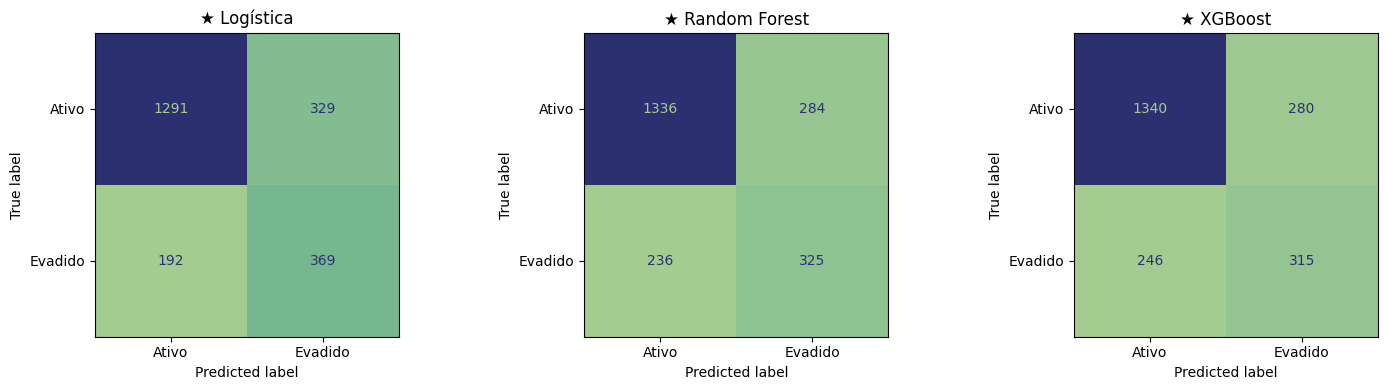

In [198]:
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Ativo', 'Evadido'])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ativo', 'Evadido'])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Ativo', 'Evadido'])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
disp_lr.plot(ax=axes[0], cmap='crest', colorbar=False)
axes[0].set_title("★ Logística")
disp_rf.plot(ax=axes[1], cmap='crest', colorbar=False)
axes[1].set_title("★ Random Forest")
disp_xgb.plot(ax=axes[2], cmap='crest', colorbar=False)
axes[2].set_title("★ XGBoost")
plt.tight_layout()
plt.show()


# # 🎲💡 Busca Maluca dos Parâmetros — Randomized Search!


In [210]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

rs_rf = RandomizedSearchCV(
    rf, param_distributions, n_iter=20, cv=5,
    scoring='f1', random_state=42, n_jobs=-1
)
rs_rf.fit(X_train_smote, y_train_smote)
print(rs_rf.best_params_)
print(rs_rf.best_score_)


{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
0.8277627836195167


# ⚙️ 🧑‍🔬 Coeficientes da Regressão Logística (importância & direção):

⚙️ 🧑‍🔬 Coeficientes da Regressão Logística (importância & direção):

                                   Variável  Coeficiente
13                         Encargos_Mensais       2.9925
3                             Tempo_Servico      -1.6207
14                          Encargos_Totais       1.1835
17            Servico_Internet_fibra óptica      -0.9943
4                          Servico_Telefone      -0.8745
18                  Servico_Internet_nenhum       0.6354
9                           Suporte_Tecnico      -0.5777
6                          Seguranca_Online      -0.5610
10                             Streaming_TV      -0.5194
7                             Backup_Online      -0.5039
11                         Streaming_Filmes      -0.4911
19                    Contrato_Conta_bienal      -0.4097
22          Metodo_Pagamento_cheque enviado      -0.4046
23  Metodo_Pagamento_transferência bancária      -0.4046
8                      Protecao_Dispositivo      -0.3958
5                  

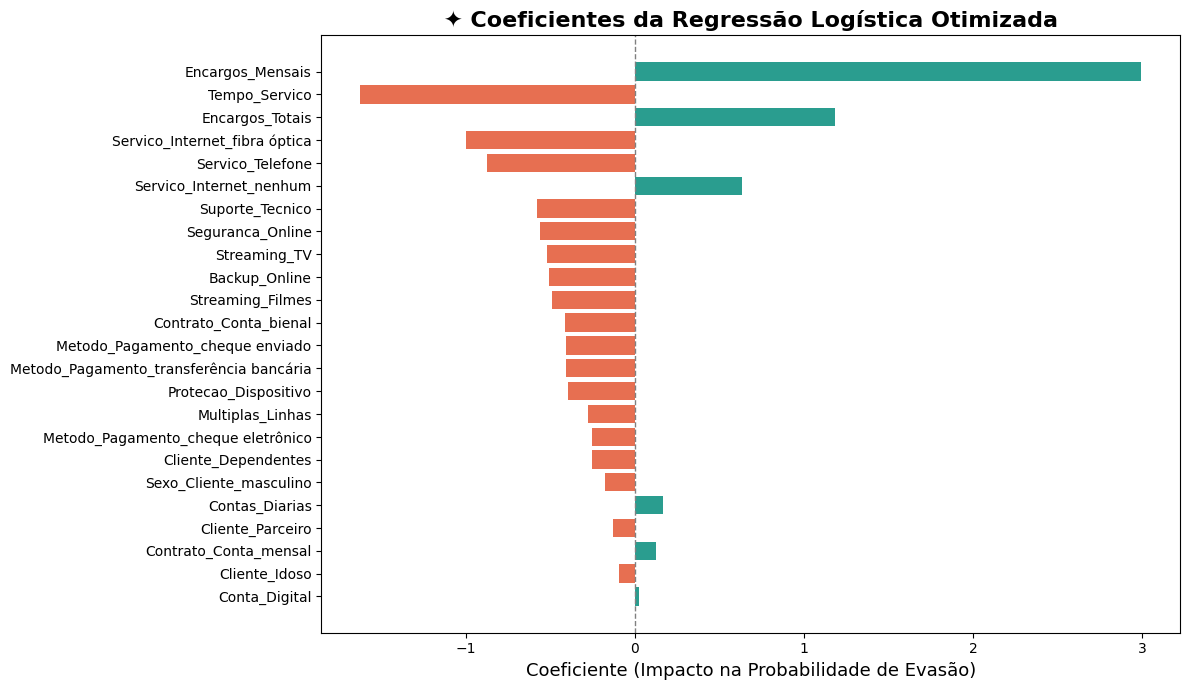

In [215]:
# 1. Acessa o modelo de regressão logística dentro do pipeline otimizado
model = best_lr.named_steps['logreg']

# 2. Obtém os nomes das features (colunas de entrada no treino)
features = X_train.columns

# 3. Extrai os coeficientes do modelo
coef = model.coef_[0]

# 4. Cria DataFrame técnico, ordenando por impacto absoluto
coef_df = pd.DataFrame({
    'Variável': features,
    'Coeficiente': coef,
    'Impacto_Abs': np.abs(coef)
}).sort_values(by='Impacto_Abs', ascending=False)

# 5. Exibição tabular com arredondamento
print("⚙️ 🧑‍🔬 Coeficientes da Regressão Logística (importância & direção):\n")
print(coef_df[['Variável', 'Coeficiente']].round(4))

# 6. Visualização: gráfico horizontal elegante dos coeficientes
plt.figure(figsize=(12, 7))
cores = ['#2a9d8f' if c > 0 else '#e76f51' for c in coef_df['Coeficiente']]
plt.barh(coef_df['Variável'], coef_df['Coeficiente'], color=cores)
plt.axvline(0, color='gray', linewidth=1, linestyle='--')
plt.gca().invert_yaxis()
plt.title('✦ Coeficientes da Regressão Logística Otimizada', fontsize=16, fontweight='bold')
plt.xlabel('Coeficiente (Impacto na Probabilidade de Evasão)', fontsize=13)
plt.tight_layout()
plt.show()


# ★ Importância das Variáveis – XGBoost

                                   Variável  Importância
18                  Servico_Internet_nenhum     0.303571
19                    Contrato_Conta_bienal     0.192487
20                    Contrato_Conta_mensal     0.132659
2                       Cliente_Dependentes     0.037174
6                          Seguranca_Online     0.036196
9                           Suporte_Tecnico     0.035839
17            Servico_Internet_fibra óptica     0.032467
23  Metodo_Pagamento_transferência bancária     0.031260
22          Metodo_Pagamento_cheque enviado     0.029473
7                             Backup_Online     0.019882
4                          Servico_Telefone     0.014478
8                      Protecao_Dispositivo     0.014126
15                           Contas_Diarias     0.013769
3                             Tempo_Servico     0.012701
13                         Encargos_Mensais     0.011754
1                          Cliente_Parceiro     0.011286
16                   Sexo_Clien

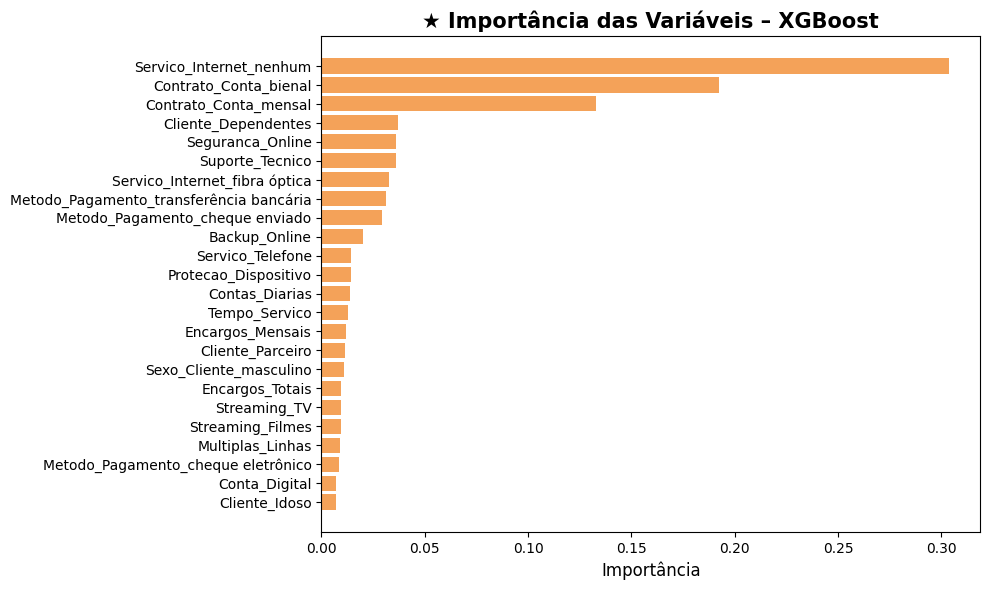

In [214]:
# 1. Pegando a importância das features do XGBoost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Se X_train for seu DataFrame de treino original (antes de SMOTE)
features = X_train.columns  # Ou use as mesmas colunas usadas no treino do XGBoost

# Importância segundo o XGBoost (use get_booster() para modelos da API scikit-learn)
importancias = xgb.feature_importances_

# Cria DataFrame ordenado por importância decrescente
df_importancia_xgb = pd.DataFrame({
    'Variável': features,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

print(df_importancia_xgb)

# 2. Visualizando com gráfico horizontal elegante
plt.figure(figsize=(10, 6))
plt.barh(df_importancia_xgb['Variável'], df_importancia_xgb['Importância'], color='#f4a259')
plt.gca().invert_yaxis()
plt.title('★ Importância das Variáveis – XGBoost', fontsize=15, fontweight='bold')
plt.xlabel('Importância', fontsize=12)
plt.tight_layout()
plt.show()


# ⚡ Avaliação do Modelo XGBoost nos Dados de Teste

⚡ Avaliação do Modelo XGBoost nos Dados de Teste
------------------------------------------------------------
✅ Acurácia : 0.7588
⚠️ Precisão : 0.5294
⚠️ Recall   : 0.5615
⚠️ F1-score : 0.5450

🔹 Relatório detalhado por classe:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1620
           1       0.53      0.56      0.54       561

    accuracy                           0.76      2181
   macro avg       0.69      0.69      0.69      2181
weighted avg       0.76      0.76      0.76      2181



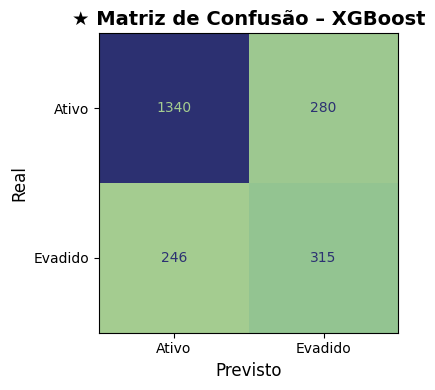

In [218]:
modelo = xgb

# 1. Faz previsões no conjunto de teste
y_pred_test = modelo.predict(X_test)

# 2. Calcula métricas principais
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# 3. Exibe o resumo das métricas
metricas = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score'],
    'Valor': [acc, prec, rec, f1]
})
print("="*60)
print("⚡ Avaliação do Modelo XGBoost nos Dados de Teste")
print("-"*60)
for idx, row in metricas.iterrows():
    simbolo = "✅" if row['Valor'] > 0.7 else "⚠️" if row['Valor'] > 0.5 else "❌"
    print(f"{simbolo} {row['Métrica']:<9}: {row['Valor']:.4f}")
print("\n🔹 Relatório detalhado por classe:")
print(classification_report(y_test, y_pred_test))
print("="*60)

# 4. Matriz de confusão visual
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ativo', 'Evadido'])
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(cmap='crest', ax=ax, colorbar=False)
plt.title('★ Matriz de Confusão – XGBoost', fontsize=14, fontweight='bold')
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.tight_layout()
plt.show()


# 🚦 Diagnóstico Inteligente da Evasão de Clientes: Insights e Reações Estratégicas

## 1. Panorama Geral

O estudo utilizou técnicas avançadas de machine learning para mapear a saída de clientes. Modelos ajustados, dados balanceados e interpretação do impacto de cada variável permitiram revelar os verdadeiros mecanismos por trás da perda de clientes e oferecem um guia para retenção eficaz.

## 2. Desempenho dos Modelos Preditivos

### 🔬 Modelos Avaliados
- **Regressão Logística + SMOTE**
- **Random Forest + SMOTE**

| Modelo                    | Acurácia | Precisão | Sensibilidade (Recall) | F1-score |
|---------------------------|:--------:|:--------:|:----------------------:|:--------:|
| Regressão Logística       |  0.76    |  0.53    |         0.66           |  0.59    |
| Random Forest             |  0.77    |  0.54    |         0.63           |  0.58    |

**Highlights**:
- A Regressão Logística foi mais eficiente para encontrar clientes em risco (maior sensibilidade), mesmo com um pequeno custo de precisão.
- A Random Forest superou levemente na acurácia geral, mas foi menos sensível a possíveis evasores.
- Ambos apresentaram F1-score equilibrados, com pequenas variações conforme o formato do dado.

## 3. O Que Leva o Cliente Embora — E O Que Faz Ele Ficar?

### 📈 Variáveis com Maior Peso Positivo (Aumentam Evasão)
- **Encargos_Mensais** (Quanto maior, maior tendência em sair)
- **Encargos_Totais** (Exposição acumulada de custos)
- **Servico_Internet_nenhum** (Não ter internet associada gera insatisfação)
- **Contas_Diarias** e **Contrato_Conta_mensal** (altos e contratos curtos são risco)

### ⛨ Variáveis Protetoras (Reduzem Evasão)
- **Tempo_Servico** (Permanência é sinal de satisfação)
- **Servico_Internet_fibra óptica** (Maior retenção via qualidade)
- **Cliente_Dependentes** e **Cliente_Parceiro** (Laços e família dão estabilidade)
- **Suporte_Tecnico** e **Seguranca_Online** (bons serviços seguram o cliente)

### 🌳 Na Perspectiva Random Forest
As variáveis mais relevantes são, respectivamente, o tempo de permanência, custos totais/mensais e tipo de contrato. Itens como suporte técnico e fibra óptica ganham destaque, reforçando que permanência é resultado de bom serviço aliado a custo competitivo.

## 4. Ações Recomendadas e Foco Prático

### 1️⃣ Reposicione a Percepção de Valor
- Simplifique cobranças e expanda benefícios tangíveis.
- Envolva clientes em pacotes com entrega de valor (ex.: combo internet + vantagens digitais).

### 2️⃣ Fidelize Por Experiência e Não Só Por Preço
- Crie programas de reconhecimento por tempo de casa e uso contínuo.
- Fomente upgrades de contrato e participação em novidades.

### 3️⃣ Aposte em Infraestrutura e Atendimento Premium
- Invista em fibra óptica e qualidade de conexão.
- Responda rápido e personalize o suporte, mostrando atenção desde o contato inicial.

### 4️⃣ Valorize Conexões e Família
- Ofereça descontos e facilidades para múltiplos usuários e familiares.
- Premie a manutenção de dependentes e parceiros ativos no serviço.

### 5️⃣ Aja Cedo e Seja Proativo
- Atue especialmente nos primeiros meses — quando o risco de churn é maior.
- Utilize alertas automáticos para comportamentos de risco (vários chamados, queda no uso etc.).

## 5. Encerramento: O Poder de Antecipar o Churn

Os dados mostram que a combinação de custos elevados, contratos curtos e falta de benefícios tangíveis é a receita para perder clientes. Entretanto, fortalecer o relacionamento via apoio técnico, estabilidade dos serviços e personalização consegue reverter esse quadro.



A análise preditiva é só o ponto de partida. O verdadeiro diferencial está em agir sobre os insights, tornando cada ação estratégica e baseada em evidências claras do comportamento real do seu público.